Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.50
Test Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.54      0.05       574
           1       0.14      0.20      0.17      5989
           2       0.89      0.57      0.69     39633

    accuracy                           0.52     46196
   macro avg       0.35      0.44      0.30     46196
weighted avg       0.78      0.52      0.62     46196



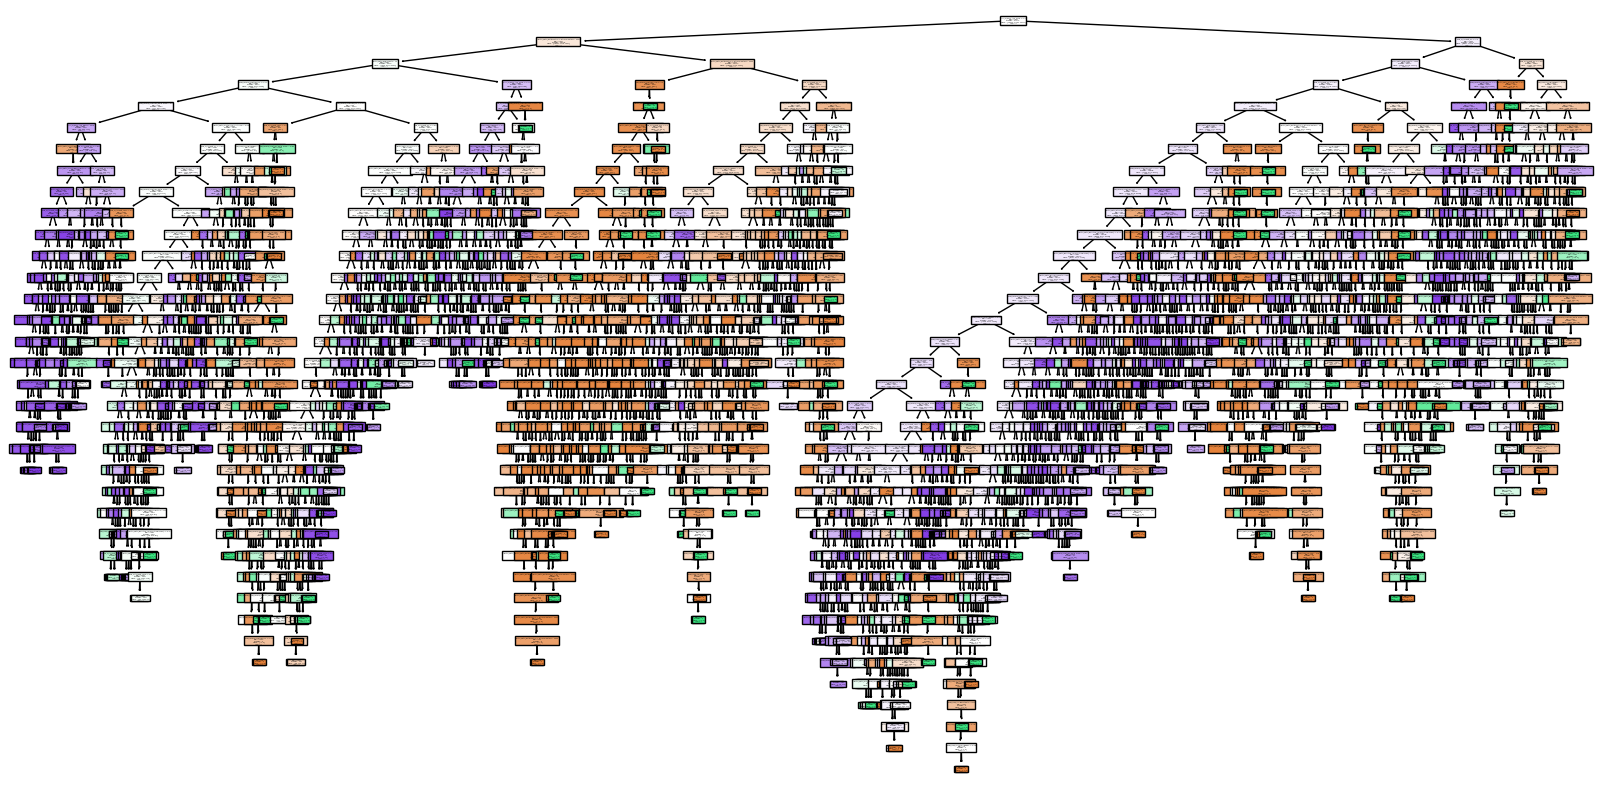

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()


<ipython-input-8-c122e338f756>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.35
Test Accuracy: 0.14
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.27      0.02       574
           1       0.13      0.70      0.23      5989
           2       0.89      0.06      0.11     39633

    accuracy                           0.14     46196
   macro avg       0.34      0.34      0.12     46196
weighted avg       0.78      0.14      0.12     46196



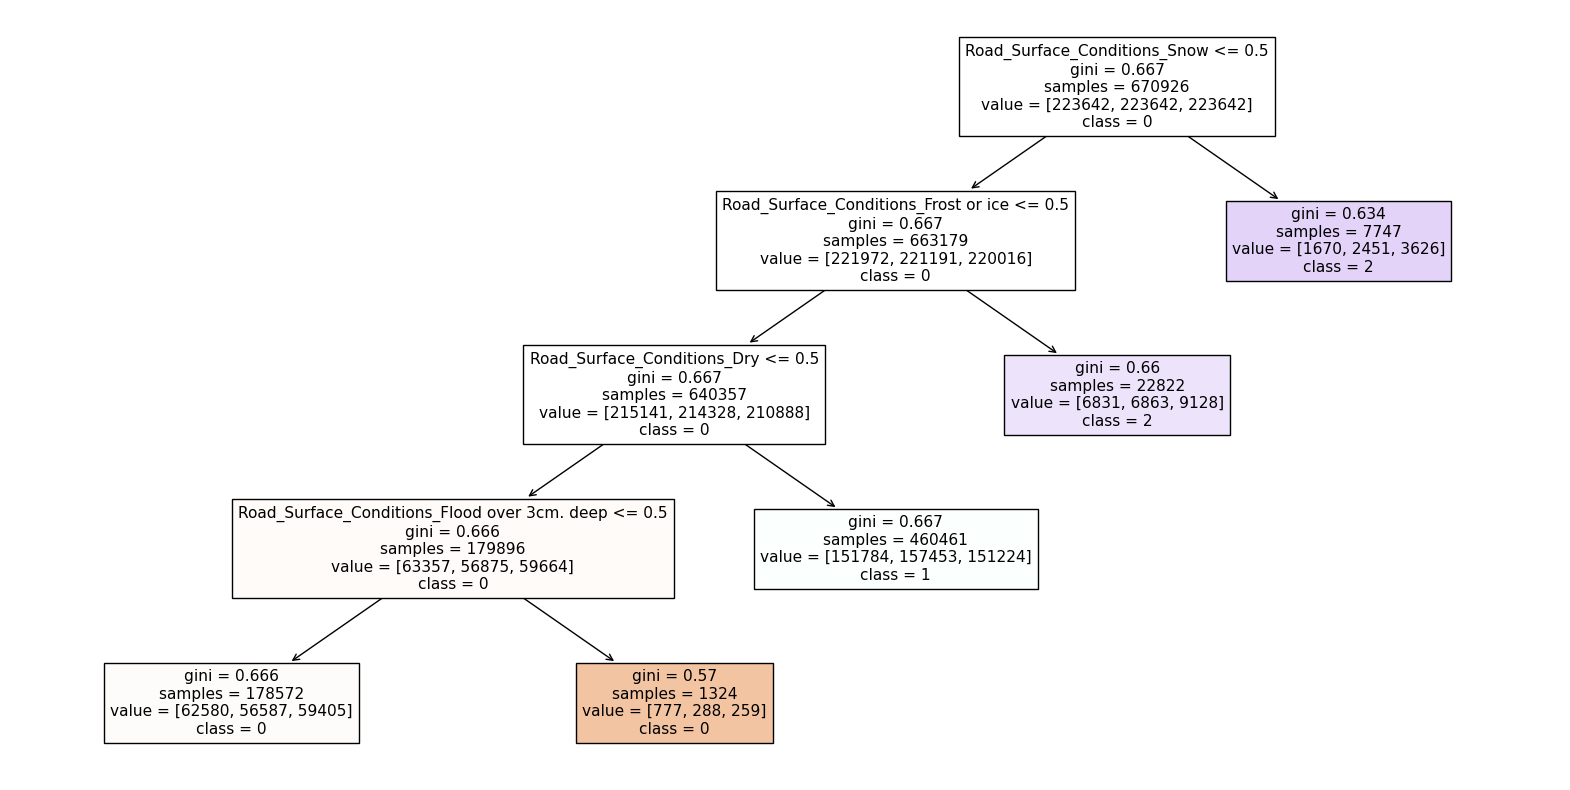

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Road_Surface_Conditions', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Road_Surface_Conditions'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()

Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.37
Test Accuracy: 0.20
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.22      0.03       574
           1       0.14      0.79      0.23      5989
           2       0.90      0.11      0.19     39633

    accuracy                           0.20     46196
   macro avg       0.35      0.37      0.15     46196
weighted avg       0.79      0.20      0.19     46196



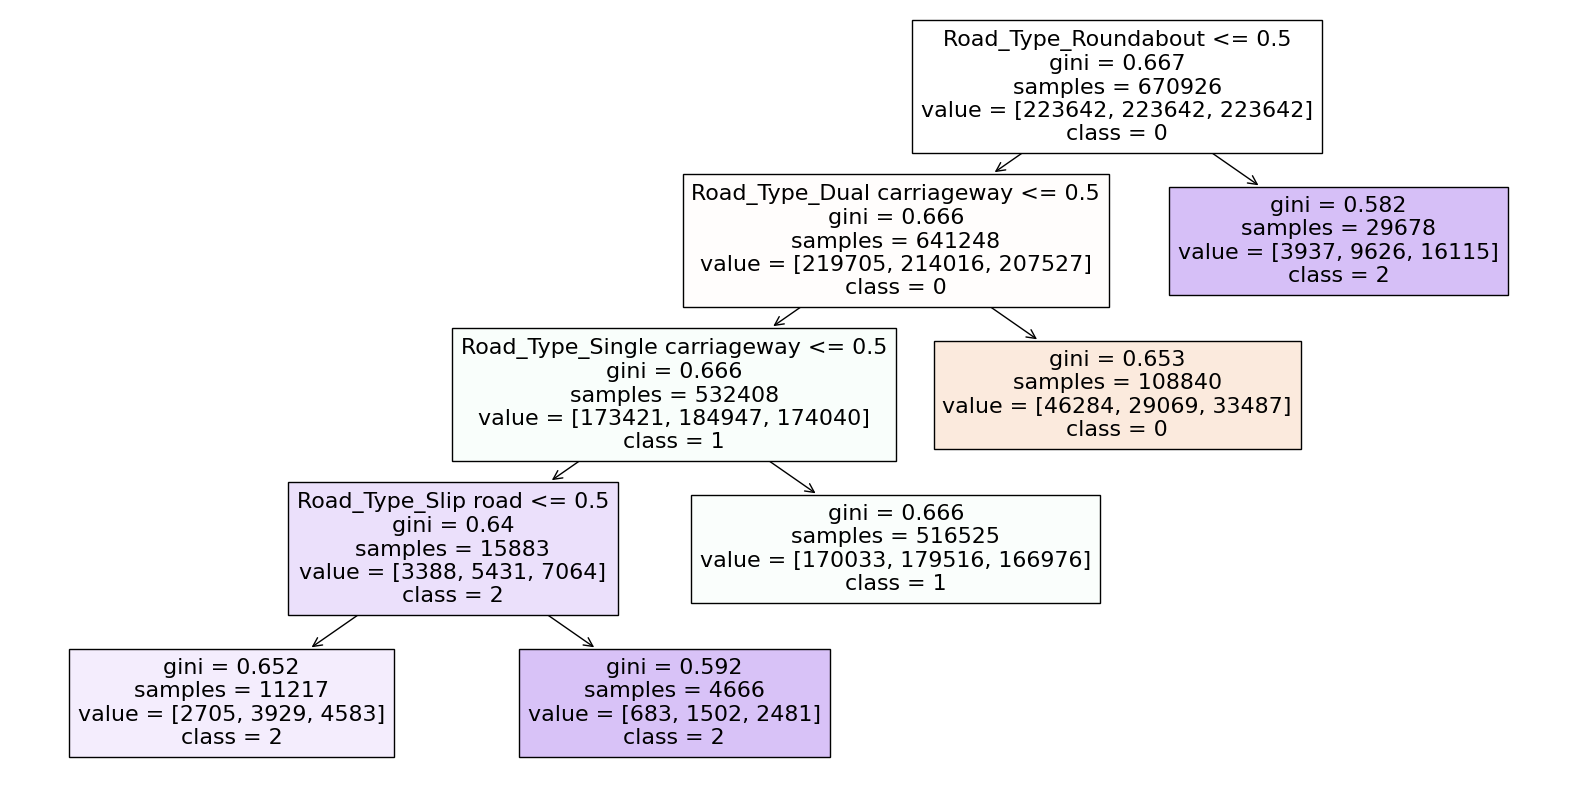

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Road_Type', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Road_Type'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()

Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.42
Test Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.56      0.04       574
           1       0.00      0.00      0.00      5989
           2       0.87      0.66      0.75     39633

    accuracy                           0.57     46196
   macro avg       0.30      0.40      0.26     46196
weighted avg       0.75      0.57      0.64     46196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


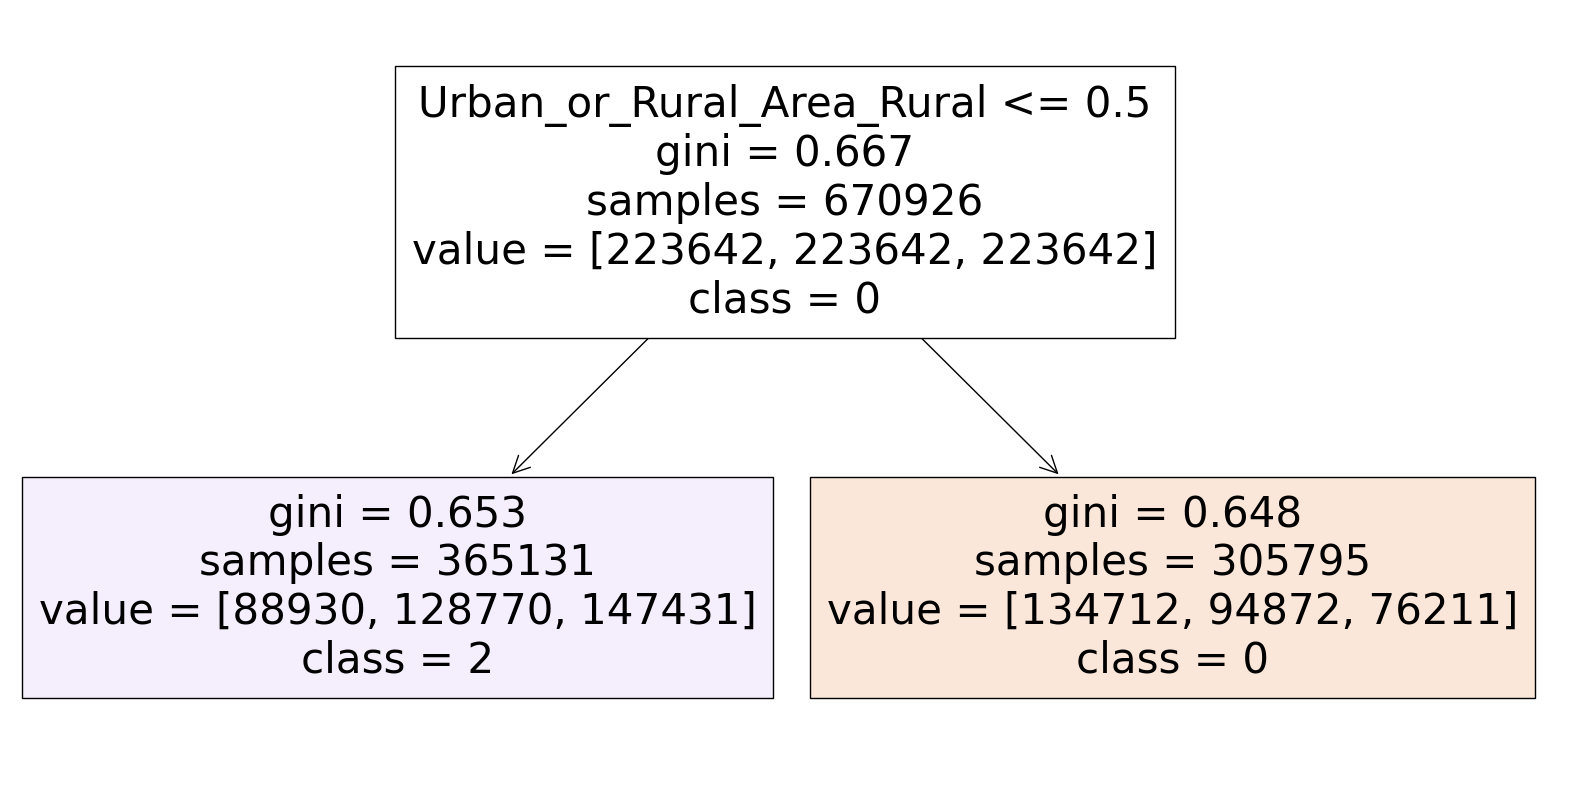

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Urban_or_Rural_Area', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Urban_or_Rural_Area'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()

Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.39
Test Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.39      0.04       574
           1       0.00      0.00      0.00      5989
           2       0.87      0.77      0.82     39633

    accuracy                           0.67     46196
   macro avg       0.30      0.39      0.29     46196
weighted avg       0.75      0.67      0.70     46196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


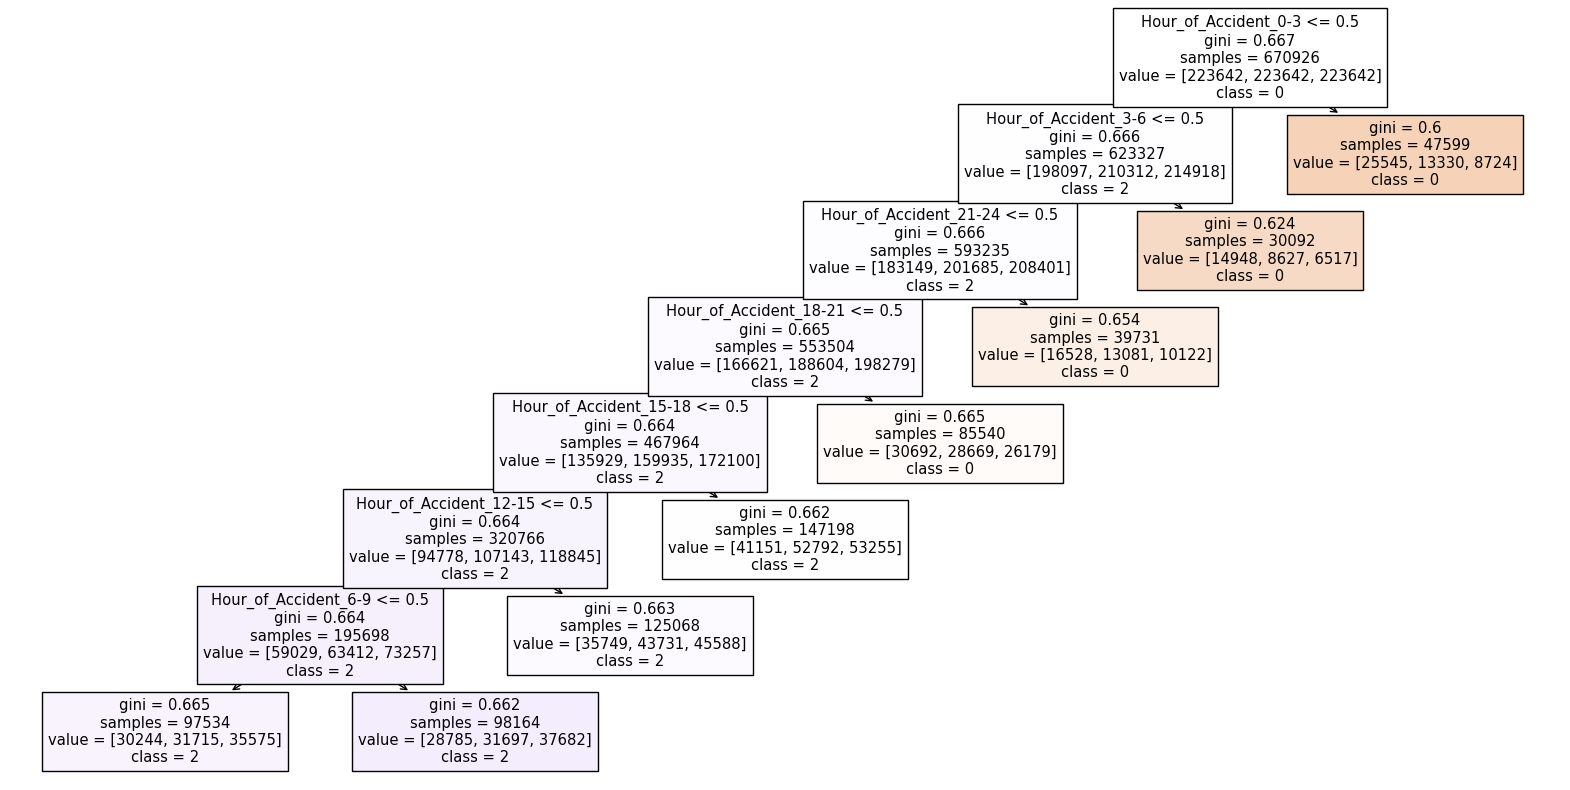

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Hour_of_Accident', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Hour_of_Accident'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Aplicar RandomUnderSampler para undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_smote, y_train_smote)

# Inicializar e treinar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = dt.predict(X_test)

# Calcular a acurácia
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train_resampled, dt.predict(X_train_resampled))

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True)
plt.show()

O ajuste fino dos hiperparâmetros do modelo envolve encontrar a combinação ideal de valores para os parâmetros do algoritmo de aprendizado de máquina, de modo a otimizar o desempenho do modelo. Existem várias técnicas para realizar esse ajuste, incluindo:

1- **Pesquisa em Grade (Grid Search)**: Essa técnica consiste em especificar uma lista de valores para cada hiperparâmetro que você deseja ajustar e, em seguida, avaliar o desempenho do modelo para todas as combinações possíveis desses valores.

2- **Pesquisa Aleatória (Random Search)**: Em vez de avaliar todas as combinações possíveis de valores de hiperparâmetros, a pesquisa aleatória amostra aleatoriamente a partir de uma distribuição de valores possíveis para cada hiperparâmetro.

3- **Otimização Bayesiana:** Esta técnica usa resultados anteriores para informar as escolhas futuras de hiperparâmetros, ajustando-se ao longo do tempo para encontrar a melhor combinação.

_______________________________________________________________________

Aqui, realizamos a pesquisa em grade com a função **GridSearchCV** do Scikit-learn para ajustar os hiperparâmetros do modelo: foram ajustados os hiperparâmetros **max_depth**, **min_samples_split** e **min_samples_leaf** da árvore de decisão, usando a pesquisa em grade. O desempenho do modelo é avaliado usando validação cruzada com 5 folds (**cv=5**). Após a pesquisa em grade, o modelo com os melhores hiperparâmetros é avaliado no conjunto de teste e sua acurácia é reportada.

Resultado: Os melhores hiperparâmetros encontrados pela pesquisa em grade foram **max_depth=None**, **min_samples_leaf=1** e **min_samples_split=2**. No entanto, a precisão do modelo no conjunto de teste continua baixa, com uma acurácia de apenas cerca de **14.3%**.

Esses resultados sugerem que, mesmo com a otimização dos hiperparâmetros, o modelo ainda está enfrentando desafios significativos para lidar com o desbalanceamento das classes e aprender padrões nos dados.

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir os hiperparâmetros a serem ajustados
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar o modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)

# Inicializar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Executar a pesquisa em grade nos dados de treinamento
grid_search.fit(X_train_resampled, y_train_resampled)

# Imprimir os melhores hiperparâmetros encontrados
print("Best Parameters:", grid_search.best_params_)

# Obter o melhor modelo encontrado pela pesquisa em grade
best_model = grid_search.best_estimator_

# Avaliar o modelo no conjunto de teste
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.1429344531994112


**Modificações:**

1- Uso de RandomForest: O RandomForest tende a ser mais robusto e pode lidar melhor com dados desbalanceados.

2- Pipeline de Reamostragem: Utilização de Pipeline da imblearn para aplicar tanto SMOTE quanto RandomUnderSampler de maneira organizada.
Normalização dos Dados:

3- Aplicação do StandardScaler para normalizar os dados de entrada, o que pode melhorar o desempenho do modelo.

Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
Training Accuracy: 0.50
Test Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.54      0.05       574
           1       0.15      0.20      0.17      5989
           2       0.89      0.57      0.70     39633

    accuracy                           0.52     46196
   macro avg       0.35      0.44      0.30     46196
weighted avg       0.78      0.52      0.62     46196



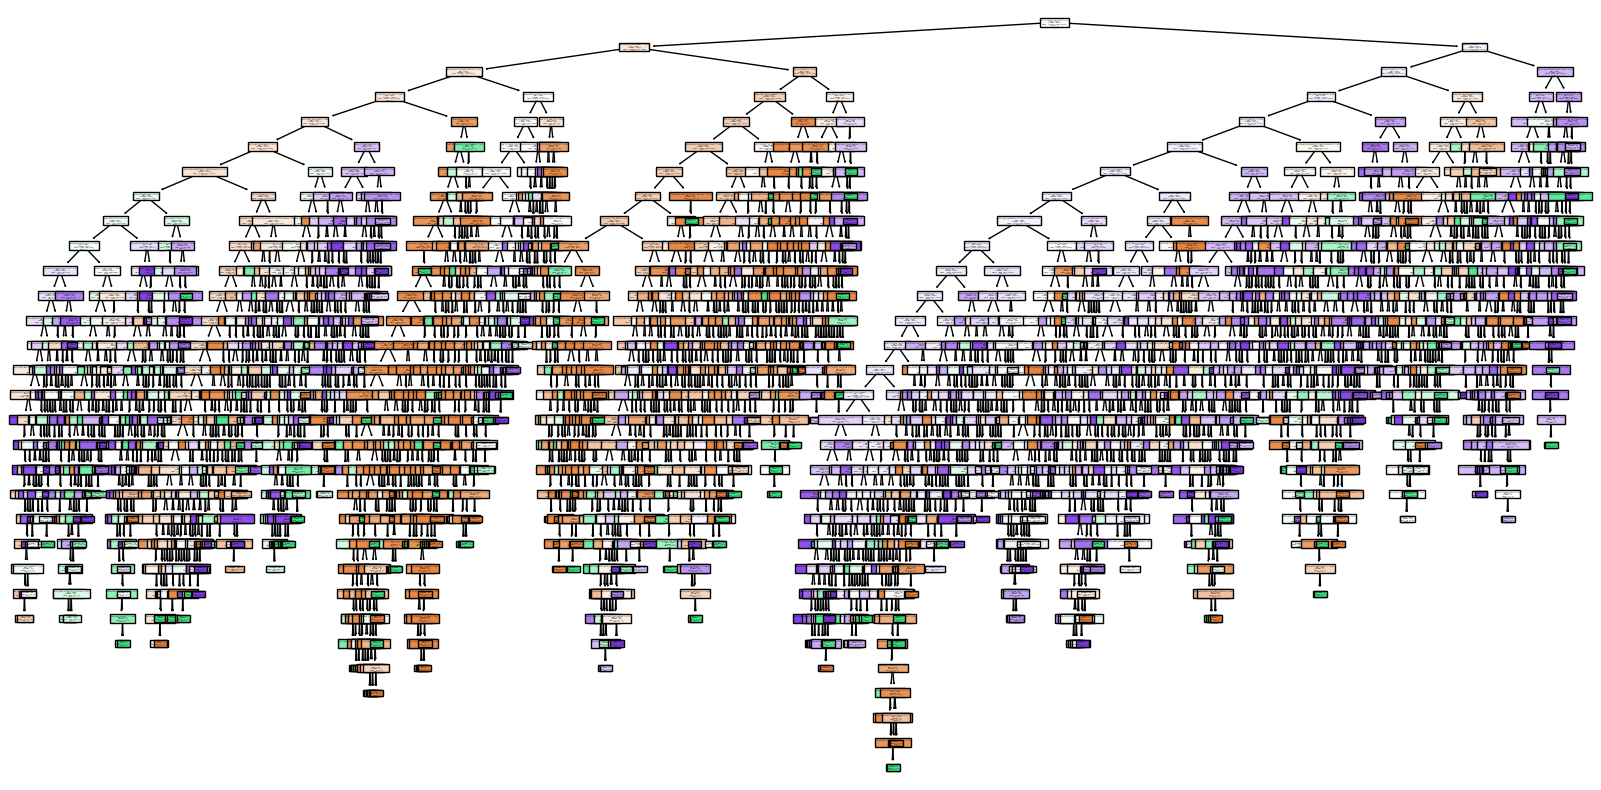

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar pipeline de reamostragem
oversample = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)
steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

# Aplicar reamostragem
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Inicializar e treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Prever nos dados de teste
y_test_pred = rf.predict(X_test)

# Calcular a acurácia
train_accuracy = accuracy_score(y_train_resampled, rf.predict(X_train_resampled))
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar uma das árvores de decisão (não recomendado para florestas aleatórias completas)
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=[str(c) for c in rf.classes_], filled=True)
plt.show()


Os resultados mostram uma melhoria na acurácia do modelo Random Forest tanto no conjunto de treinamento quanto no conjunto de teste em comparação com o modelo anterior. No entanto, ainda há espaço para melhorias, especialmente em relação à **precisão** e **recall** para a classe minoritária (classe 0).

A precisão do modelo na classe 0 é muito baixa, o que significa que o modelo está tendo dificuldade em prever corretamente os casos dessa classe. Similarmente, o recall para a classe 0 é relativamente baixo, indicando que o modelo está perdendo muitos casos positivos dessa classe.

Para melhorar esses aspectos, foram feitos mais ajustes de **hiperparâmetros** no código abixo, assim como foi usada uma nova técnica de **reamostragem**:


_______________________________________________________________________
No código abaixo, usamos um **Pipeline** para combinar a técnica de reamostragem SMOTE com a classificação por meio de uma Random Forest. Em seguida, definimos uma grade de hiperparâmetros para ajustar os parâmetros do classificador Random Forest usando a pesquisa em grade **GridSearchCV**. Finalmente, avaliamos o modelo resultante nos dados de teste e imprimimos o relatório de classificação:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Verificar a codificação das classes em y
print("Classes in y before encoding:", y.unique())

# Garantir que y esteja codificado como números inteiros ou categorias (se necessário)
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Verificar a codificação das classes em y após possível ajuste
print("Classes in y after encoding:", y.unique())

# Converter todas as colunas de X para float
X = X.astype(float)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar pipeline de reamostragem e classificação
pipeline = Pipeline([
    ('sampling', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir grade de hiperparâmetros para a pesquisa em grade
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Inicializar e executar a pesquisa em grade
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter o melhor modelo encontrado pela pesquisa em grade
best_model = grid_search.best_estimator_

# Prever nos dados de teste
y_test_pred = best_model.predict(X_test)

# Calcular a acurácia
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Visualizar uma das árvores de decisão do melhor modelo (não recomendado para florestas aleatórias completas)
plt.figure(figsize=(20, 10))
plot_tree(best_model.named_steps['classifier'].estimators_[0], feature_names=X.columns, class_names=[str(c) for c in best_model.classes_], filled=True)
plt.show()


Classes in y before encoding: ['Serious' 'Slight' 'Fatal']
Classes in y after encoding: [1 2 0]
